In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('synthetic_bank_marketing_dataset.csv')

# View the first few rows
print(data.head())


   age          job  marital  education  balance  day month  duration  \
0   69      retired   single  secondary    13437    8   aug       554   
1   32  blue-collar   single  secondary    14855    8   jul      2140   
2   89      student   single   tertiary    79947   30   oct      4977   
3   78   unemployed   single  secondary     8847   17   sep      2678   
4   38   unemployed  married  secondary     1236   30   feb      4916   

   campaign  pdays  previous  outcome    y  
0         3     29         4  unknown  yes  
1         9     18         4  unknown  yes  
2         5     13         3  unknown   no  
3         3     13         3  success  yes  
4         9     20         0  unknown  yes  


In [5]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop('y_yes', axis=1)  # 'y_yes' is the encoded target column
y = data['y_yes']

age          0
job          0
marital      0
education    0
balance      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
outcome      0
y            0
dtype: int64


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Create and train the decision tree model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Create and train the decision tree model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 49.00%
Confusion Matrix:
 [[347 390]
 [375 388]]
Classification Report:
               precision    recall  f1-score   support

       False       0.48      0.47      0.48       737
        True       0.50      0.51      0.50       763

    accuracy                           0.49      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.49      0.49      0.49      1500



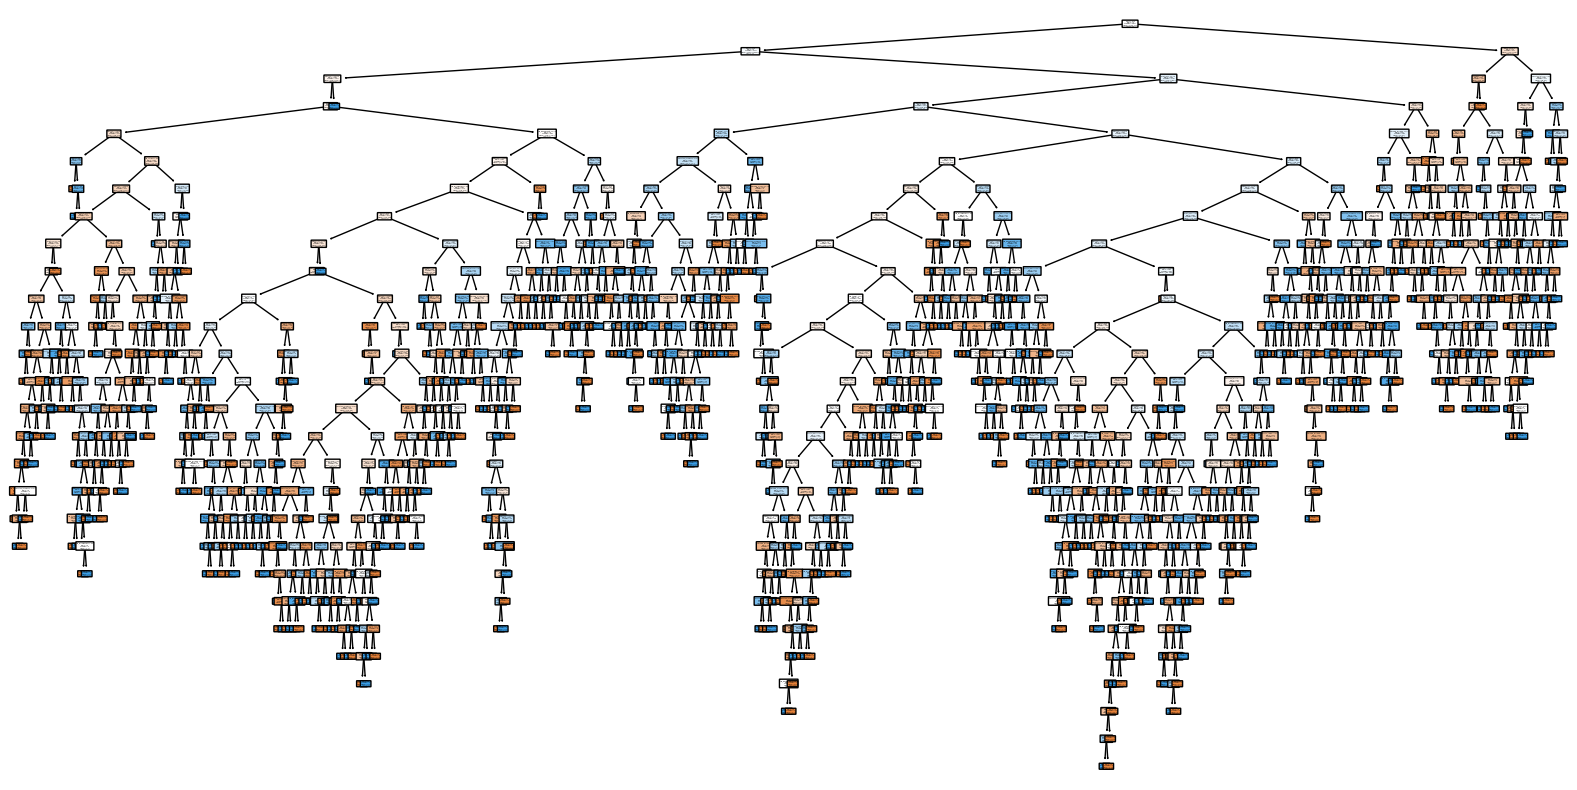

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()